In [1]:
import pyaudio
import numpy as np
import time
import csv
import wave
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 2048 # RATE / number of updates per second
RECORD_SECONDS = 10
window = np.blackman(CHUNK)
x = 0

# seq Hz.
phrase=[]
seq=[]

def soundPlot(stream):
    t1=time.time()
    data = stream.read(CHUNK, exception_on_overflow=False)
    waveData = wave.struct.unpack("%dh"%(CHUNK), data)
    npArrayData = np.array(waveData)
    indata = npArrayData*window

    fftData=np.abs(np.fft.rfft(indata))
    fftTime=np.fft.rfftfreq(CHUNK, 1./RATE)
    which = fftData[1:].argmax() + 1

    #print(("took %.02f ms"%((time.time()-t1)*1000)))
    # use quadratic interpolation around the max
    if which != len(fftData)-1:
        y0,y1,y2 = np.log(fftData[which-1:which+2:])
        x1 = (y2 - y0) * .5 / (2 * y1 - y2 - y0)
        # find the frequency and output it
        thefreq = (which+x1)*RATE/CHUNK
        #print("The freq is %f Hz." % (thefreq))
    else:
        thefreq = which*RATE/CHUNK
        #print("The freq is %f Hz." % (thefreq))
    
    phrase.append(thefreq)

if __name__=="__main__":
    p=pyaudio.PyAudio()
    stream=p.open(format=pyaudio.paInt16,channels=1,rate=RATE,input=True,
                  frames_per_buffer=CHUNK)

    for i in range(0, round(RATE / CHUNK * RECORD_SECONDS)):
        soundPlot(stream)
        
    with open('seq.csv', 'w') as file:
        writer = csv.writer(file, lineterminator='\n')
        writer.writerow(phrase)

    stream.stop_stream()
    stream.close()
    p.terminate()

In [33]:
import pyaudio
import numpy as np
import time
import csv
import wave
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

seq=[]
with open('seq.csv', 'r') as f:
    reader = csv.reader(f)

    for row in reader:
        for i in row:
            seq.append(round(float(i),2))

In [34]:
print(seq)

[124.02, 164.86, 114.35, 175.67, 168.64, 163.59, 168.07, 178.58, 157.68, 89.85, 176.96, 170.82, 166.11, 186.45, 153.45, 251.17, 165.04, 178.46, 661.27, 241.26, 104.99, 231.41, 97.4, 166.03, 169.6, 166.23, 79.65, 86.66, 585.07, 587.76, 586.61, 587.64, 588.03, 587.23, 589.42, 96.29, 586.92, 103.24, 172.36, 582.45, 588.06, 590.14, 588.58, 587.34, 586.43, 587.42, 587.26, 105.16, 585.23, 159.14, 520.74, 254.57, 265.29, 255.26, 263.83, 99.95, 266.78, 94.93, 169.97, 94.36, 78.66, 87.74, 78.16, 92.01, 83.46, 103.5, 136.78, 96.84, 143.24, 95.28, 78.13, 94.17, 783.4, 1965.25, 1966.59, 91.42, 161.28, 89.1, 165.14, 86.29, 165.83, 95.18, 165.6, 785.72, 1965.06, 86.26, 79.9, 91.99, 83.44, 81.14, 81.85, 87.8, 77.41, 86.48, 81.07, 1750.62, 1752.74, 88.55, 82.14, 89.58, 83.62, 7584.53, 82.04, 80.73, 84.68, 83.24, 1750.04, 84.91, 88.12, 80.65, 85.99, 82.23, 83.51, 81.03, 92.28, 169.16, 82.76, 86.48, 88.0, 78.6, 89.58, 85.15, 170.93, 169.38, 83.32, 160.72, 171.09, 171.26, 168.37, 168.26, 169.04, 82.17, 1

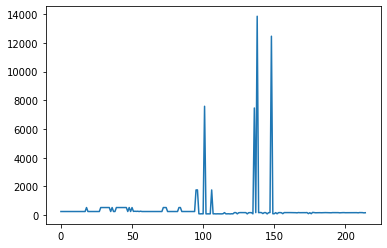

In [52]:
clear_output(wait = True)
plt.cla
plt.plot(seq)
plt.show()

In [53]:
if seq[i]<246:
    seq[i]=246
elif seq[i]>523:
    seq[i]=523
print(seq)

[246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 251.17, 246, 246, 523, 246, 246, 246, 246, 246, 246, 246, 246, 246, 523, 523, 523, 523, 523, 523, 523, 246, 523, 246, 246, 523, 523, 523, 523, 523, 523, 523, 523, 246, 523, 246, 520.74, 254.57, 265.29, 255.26, 263.83, 246, 266.78, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 523, 523, 523, 246, 246, 246, 246, 246, 246, 246, 246, 523, 523, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 1750.62, 1752.74, 88.55, 82.14, 89.58, 83.62, 7584.53, 82.04, 80.73, 84.68, 83.24, 1750.04, 84.91, 88.12, 80.65, 85.99, 82.23, 83.51, 81.03, 92.28, 169.16, 82.76, 86.48, 88.0, 78.6, 89.58, 85.15, 170.93, 169.38, 83.32, 160.72, 171.09, 171.26, 168.37, 168.26, 169.04, 82.17, 163.32, 169.0, 165.4, 86.45, 7464.48, 167.49, 13861.58, 166.73, 175.92, 169.09, 103.6, 169.64, 168.07, 80.55, 164.98, 176.03, 12469.21, 89.04, 91.76, 167.43, 88.67, 167.69, 171.87, 161.56, 96.48, 170.81, 169.08, 168.56, 171.13, 1

In [54]:
import numpy as np

from htm.bindings.sdr import SDR
from htm.bindings.encoders import ScalarEncoder, ScalarEncoderParameters
from htm.algorithms import SpatialPooler as SP
from htm.algorithms import TemporalMemory as TM
from htm.bindings.algorithms import Predictor

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [55]:
scalarEncoderParams = ScalarEncoderParameters()
scalarEncoderParams.minimum = 246
scalarEncoderParams.maximum = 523
scalarEncoderParams.activeBits = 4
scalarEncoderParams.size = 128
scalarEncoderParams.clipInput  = True

enc = ScalarEncoder(scalarEncoderParams)

print(enc.encode(124.02))

SDR( 128 ) 0, 1, 2, 3


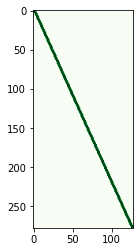

In [56]:
n_samples = int(enc.parameters.maximum - enc.parameters.minimum + 1)

sdrs = []
for i in np.linspace(enc.parameters.minimum, enc.parameters.maximum, n_samples):
    sdrs.append( enc.encode( i ).dense )

plt.imshow(np.array(sdrs), cmap = "Greens")
plt.show()

In [57]:
inputSDR  = SDR( dimensions = (128, ) )
activeSDR = SDR( dimensions = (576,) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)

In [58]:
tm = TM(
    columnDimensions = (576,),
    cellsPerColumn=8,
    initialPermanence=0.5,
    connectedPermanence=0.5,
    minThreshold=8,
    maxNewSynapseCount=20,
    permanenceIncrement=0.1,
    permanenceDecrement=0.0,
    activationThreshold=8,
)

In [59]:
predictor = Predictor( steps=[1,2,3,4,5])
resolution = 0.01
minimum = 246

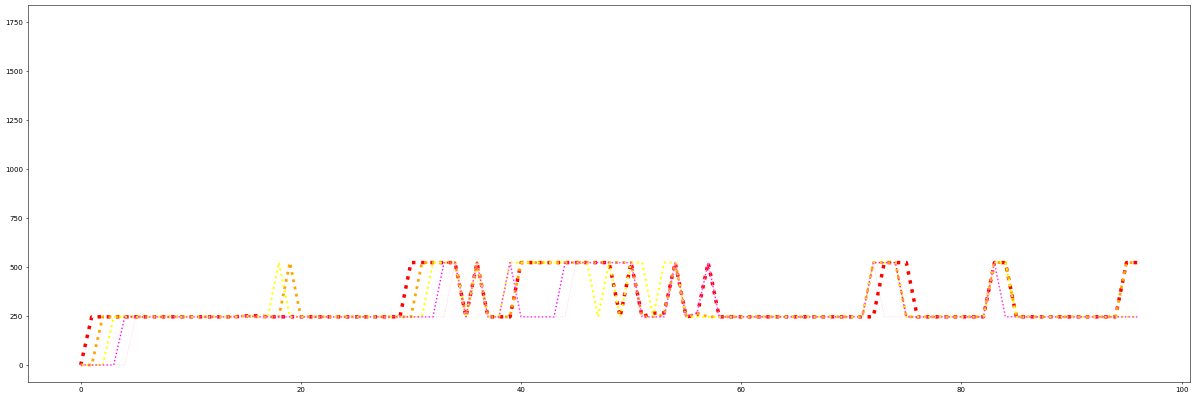

TypeError: learn(): incompatible function arguments. The following argument types are supported:
    1. (self: htm.bindings.algorithms.Predictor, recordNum: int, pattern: htm.bindings.sdr.SDR, classification: List[int]) -> None
    2. (self: htm.bindings.algorithms.Predictor, recordNum: int, pattern: htm.bindings.sdr.SDR, classification: int) -> None

Invoked with: <htm.bindings.algorithms.Predictor object at 0x11cd3cd50>, 97, <htm.bindings.sdr.SDR object at 0xc5f9c8810>, -15744

In [60]:
predictions = {1: [], 2: [], 3: [], 4: [], 5: []}
for i in range(len(seq)):
    inputSDR = enc.encode(seq[i])
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=True)
    
    predictor.learn(i, tm.getActiveCells(), int((seq[i] - minimum) / resolution))

    pdf = predictor.infer( tm.getActiveCells() )
    for n in (1,2,3,4,5):
        if pdf[n]:
            predictions[n].append( round(np.argmax( pdf[n] ) * resolution + minimum, 2) )
        else:
            predictions[n].append(float(0))
            
    clear_output(wait = True)
    plt.cla
    plot = plt.figure(figsize=(30,10),dpi=50)
    plt.plot(seqi, color='green', linestyle = "solid", linewidth = 6.0)
    plt.plot(predictions[1], color='red', linestyle = "dotted", linewidth = 5.0)
    plt.plot(predictions[2], color='orange', linestyle = "dotted", linewidth = 4.0)
    plt.plot(predictions[3], color='yellow', linestyle = "dotted", linewidth = 3.0)
    plt.plot(predictions[4], color='magenta', linestyle = "dotted", linewidth = 2.0)
    plt.plot(predictions[5], color='pink', linestyle = "dotted", linewidth = 1.0)
    plt.show()
    
print(predictions)